In [1]:
# -*- coding: utf-8 -*-

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import load_csv_data 
dat_dir = '../data/'
# load raw data
y, tx, ids = load_csv_data(dat_dir+'train.csv', sub_sample=False)
print('------ data retrieved ------')

print('The dataset records', tx.shape[0], 'events with', 
      tx.shape[1], 'features')

------ data retrieved ------
The dataset records 250000 events with 30 features


In [3]:
# get feature names 
feature_name = list(np.genfromtxt(dat_dir + 'train.csv', 
                                  delimiter=",", dtype=str, 
                                  max_rows = 1)[2:])

In [7]:
feature_name

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

In [4]:
from preprocess import handle_outliers
# handle outliers: all the -999 values 
# are put to the mean value taken from the rest of the sample
tx_new, y_new = handle_outliers(tx, y, -999, 'mean')
# set y in {0,1} instead of {-1,1}
# y_new[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


In [5]:
m1 = np.c_[y,tx]

m2 = np.c_[y,tx_new]

In [6]:
m1.shape

(250000, 31)

In [28]:
dat_dir

'../data/'

In [6]:
import pandas as pd
train=pd.read_csv(dat_dir+'train.csv')
train.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [3]:
import pandas as pd
dat_dir = '../data/'
test=pd.read_csv(dat_dir+'test.csv')
test.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [4]:
test[test['DER_mass_MMC']==-999.000].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,86488.0,633304.412554,163961.400013,350000.000,490890.00000,632979.5000,775582.25000,918224.000
DER_mass_MMC,86488.0,-999.000000,0.000000,-999.000,-999.00000,-999.0000,-999.00000,-999.000
DER_mass_transverse_met_lep,86488.0,89.507163,32.079039,1.978,73.33975,82.8695,96.53825,968.669
DER_mass_vis,86488.0,74.483528,47.570606,6.810,45.67675,64.8380,89.80450,1264.965
DER_pt_h,86488.0,28.091603,38.421277,0.000,2.53175,17.9440,37.76525,808.605
DER_deltaeta_jet_jet,86488.0,-883.477210,319.823009,-999.000,-999.00000,-999.0000,-999.00000,7.584
DER_mass_jet_jet,86488.0,-852.352993,420.841971,-999.000,-999.00000,-999.0000,-999.00000,3489.951
DER_prodeta_jet_jet,86488.0,-883.685696,319.247387,-999.000,-999.00000,-999.0000,-999.00000,16.060
DER_deltar_tau_lep,86488.0,2.049119,0.792209,0.237,1.48200,2.0440,2.56000,5.688
DER_pt_tot,86488.0,16.732108,24.327240,0.000,2.03200,6.1470,24.79000,759.363


In [51]:
train_0_or_1 = train.query('PRI_jet_num == 0 or PRI_jet_num == 1' )
train_other = train.query('PRI_jet_num != 0 and PRI_jet_num != 1' )

train_0_or_1.to_csv(dat_dir+ 'train_0_or_1.csv')
train_other.to_csv(dat_dir+ 'train_other.csv')

In [39]:
test_0_or_1 = test.query('PRI_jet_num == 0 or PRI_jet_num == 1' )
test_other = test.query('PRI_jet_num != 0 and PRI_jet_num != 1' )

In [42]:
test_0_or_1.to_csv(dat_dir+ 'test_0_or_1.csv')
test_other.to_csv(dat_dir+ 'test_other.csv')

In [8]:
df = train
df_ = df[(df['PRI_jet_num']!=0)]
df_ = df_[(df_['PRI_jet_num']!=1)]
# print("df['PRI_jet_num']==4")
df_[df_['DER_mass_MMC']==-999.000].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4429.0,224331.673290,72278.630178,100056.000,161543.000,222765.000,286227.000,349992.000
DER_mass_MMC,4429.0,-999.000000,0.000000,-999.000,-999.000,-999.000,-999.000,-999.000
DER_mass_transverse_met_lep,4429.0,104.507513,49.135885,17.303,75.935,93.373,118.633,690.075
DER_mass_vis,4429.0,88.792604,66.537098,10.069,53.828,74.609,103.897,1329.913
DER_pt_h,4429.0,88.608566,59.404701,0.417,47.446,77.324,113.605,478.680
DER_deltaeta_jet_jet,4429.0,1.934716,1.531809,0.000,0.694,1.568,2.813,7.777
DER_mass_jet_jet,4429.0,273.463370,331.680543,18.040,97.041,160.567,297.601,3266.900
DER_prodeta_jet_jet,4429.0,0.090789,3.324369,-14.911,-1.069,0.085,1.533,16.690
DER_deltar_tau_lep,4429.0,2.165449,0.914409,0.329,1.454,2.162,2.859,5.466
DER_pt_tot,4429.0,43.815480,44.586944,0.044,13.838,31.402,57.832,513.659


In [39]:
# df = df.drop(columns='Id')
col_outliers = df.columns[df.min(axis=0)==-999]
df_fill = df.copy()
for col in col_outliers:
    df_fill.loc[df_fill[col] == -999.0, col] = np.nan

In [46]:
df_sample = df_fill.sample(1000)

In [50]:
tx.shape

(250000, 30)

In [52]:
x = tx

In [64]:
r = ((x[np.newaxis,:,:] - np.mean(x,axis=0)) / np.std(x, axis = 0))
r[0,:,0]

array([ 0.31213622,  0.73804352,  0.01538657, ..., -0.31369178,
       -0.51285421,  0.01538657])

In [79]:
from preprocess import max_min_normalization,z_score_normalization,sigmoid_normalization

In [77]:
z_score_normalization(tx)

array([[ 3.12136218e-01,  6.83319669e-02,  4.07680272e-01, ...,
         1.14452245e+00, -2.52481930e+00,  4.12510497e-01],
       [ 7.38043519e-01,  5.52504823e-01,  5.40136414e-01, ...,
        -2.87718676e-04, -9.48723466e-04, -2.73819964e-01],
       [ 1.53865700e-02,  3.19515553e+00,  1.09655998e+00, ...,
        -2.87718676e-04, -9.48723466e-04, -2.93969845e-01],
       ...,
       [-3.13691784e-01,  3.19316447e-01, -1.30863670e-01, ...,
        -2.87718676e-04, -9.48723466e-04, -3.17017229e-01],
       [-5.12854205e-01, -8.45323970e-01, -3.02973380e-01, ...,
        -2.87718676e-04, -9.48723466e-04, -7.45439413e-01],
       [ 1.53865700e-02,  6.65336083e-01, -2.53522760e-01, ...,
        -2.87718676e-04, -9.48723466e-04, -7.45439413e-01]])

In [84]:
tx_new = sigmoid_normalization(tx)

In [ ]:
# np.corrcoef(tx_new)

In [83]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'ascii_letters' is not defined

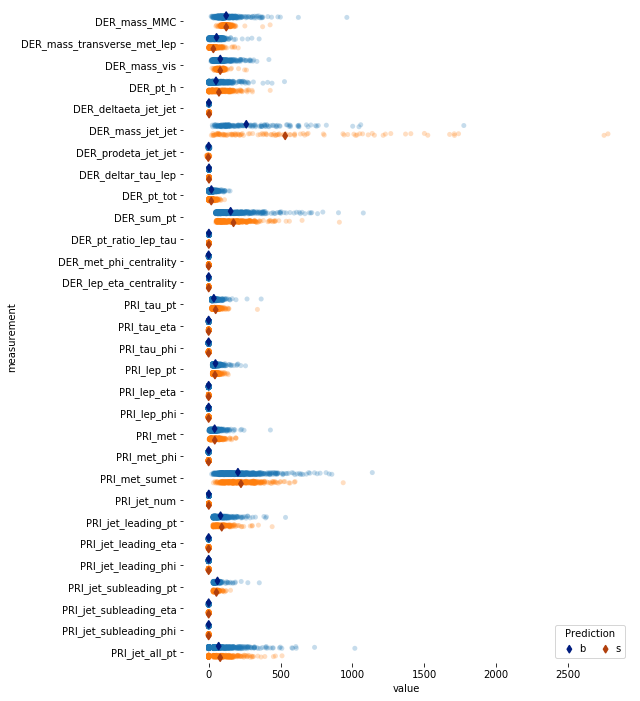

In [49]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(df_sample, "Prediction", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(8, 12))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="Prediction",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="Prediction",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)


# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], title="Prediction",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

plt.show()

In [7]:
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [8]:
df = df.drop(columns='Id')

In [20]:
df['Prediction'] = y

In [21]:
# df[df[Prediction]=='s']
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,1.0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,-1.0,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-1.0,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,-1.0,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,-1.0,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [23]:
datas

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Prediction,1.000000,0.239149,-0.351428,-0.014055,0.192526,0.141646,0.191766,0.140554,0.012245,-0.015287,...,0.007475,0.135520,0.133549,0.157604,0.150469,0.150468,0.140714,0.141265,0.141256,0.134296
DER_mass_MMC,0.239149,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,...,0.007411,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372
DER_mass_transverse_met_lep,-0.351428,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,...,-0.015925,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009
DER_mass_vis,-0.014055,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,...,-0.001467,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902
DER_pt_h,0.192526,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,...,0.008585,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616
DER_deltaeta_jet_jet,0.141646,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,...,0.005245,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446
DER_mass_jet_jet,0.191766,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,...,0.005167,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962
DER_prodeta_jet_jet,0.140554,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,...,0.005254,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620
DER_deltar_tau_lep,0.012245,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,...,-0.001570,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737
DER_pt_tot,-0.015287,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,...,0.002515,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382


In [17]:
feature_name.insert(0,'Prediction')
import pandas as pd
df=pd.DataFrame(m1,columns=feature_name)
df.head()

In [ ]:
m2 = np.c_[y,tx_new]

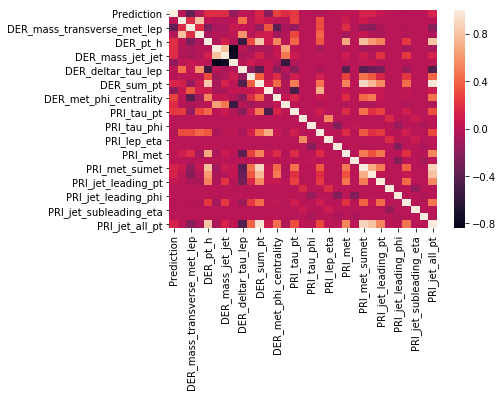

In [19]:
datas= df.corr()  


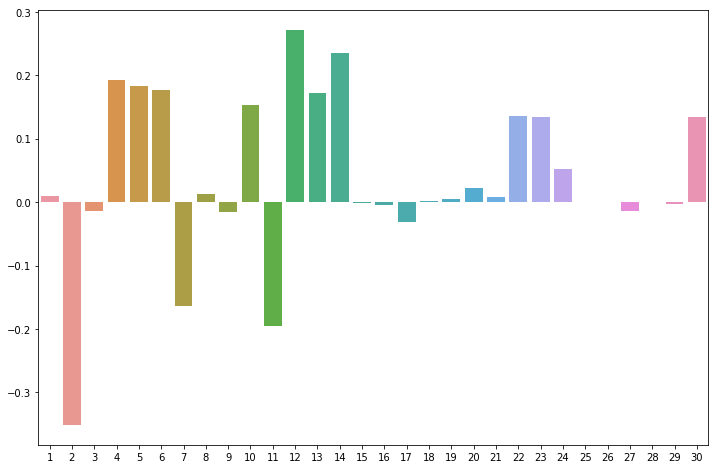

In [81]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=list(range(1,31)) , y = list(datas['Prediction'])[1:])
# plt.xticks(range(31))
plt.show()

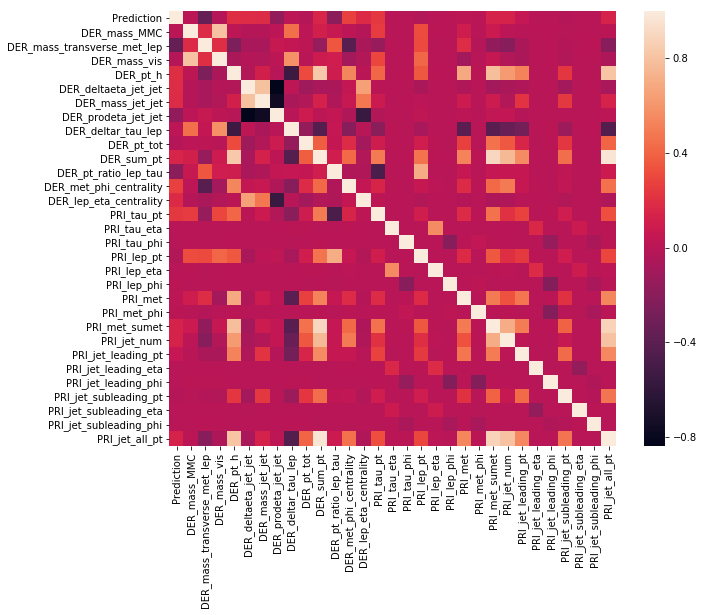

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(datas)  
plt.show()

In [61]:
datas.

Prediction                     1.000000
DER_mass_MMC                   0.009429
DER_mass_transverse_met_lep   -0.351428
DER_mass_vis                  -0.014055
DER_pt_h                       0.192526
DER_deltaeta_jet_jet           0.183182
DER_mass_jet_jet               0.176822
DER_prodeta_jet_jet           -0.164130
DER_deltar_tau_lep             0.012245
DER_pt_tot                    -0.015287
DER_sum_pt                     0.153236
DER_pt_ratio_lep_tau          -0.195398
DER_met_phi_centrality         0.271752
DER_lep_eta_centrality         0.172205
PRI_tau_pt                     0.235238
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_lep_pt                    -0.031948
PRI_lep_eta                    0.001516
PRI_lep_phi                    0.004125
PRI_met                        0.022466
PRI_met_phi                    0.007475
PRI_met_sumet                  0.135520
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.051617


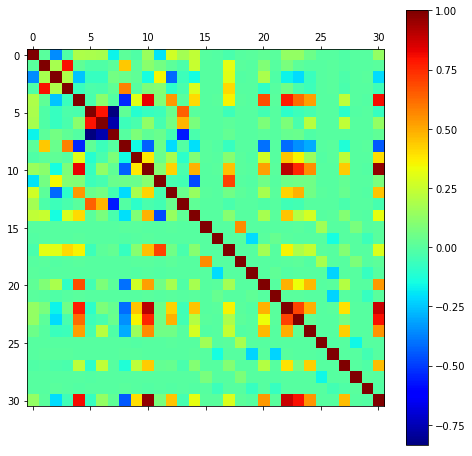

In [66]:

# cmap = plt.cm.RdYlBu
cmap = plt.cm.jet

f, ax = plt.subplots(figsize=(8, 8))
fig = ax.matshow(datas,cmap=cmap)

plt.colorbar(fig)
plt.show()

In [40]:

# cmap = plt.cm.RdYlBu
cmap = plt.cm.jet

f, ax = plt.subplots(figsize=(8, 8))
fig = ax.matshow(datas,cmap=cmap)

plt.colorbar(fig)
plt.show()

(250001, 30)

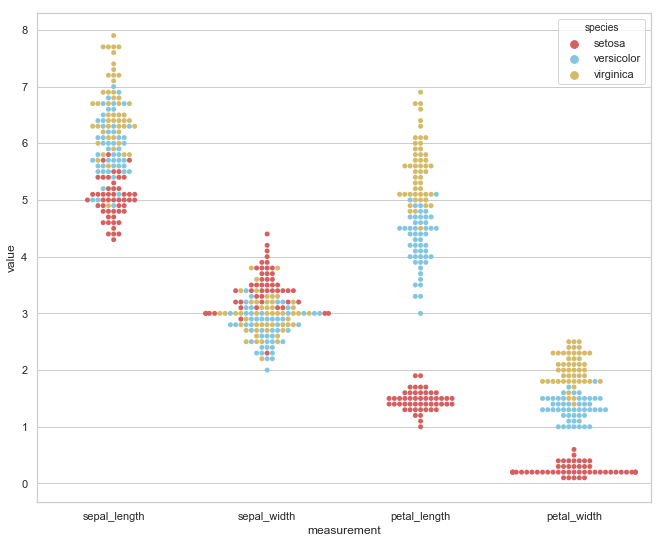

In [4]:
import pandas as pd

sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")
f, ax = plt.subplots(figsize=(11, 9))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)
plt.show()